In [1]:
import numpy as np
import matplotlib.pyplot as plt

# k-Nearest Neighbors (kNN)

k-Nearest neighbor (kNN) is an extremely simple yet surprisingly effective method for classification. 
The only things it requires are:

- Some notion of distance (Euclidean distance is the most common choice).
- An assumption that points that are close to one another are similar.

Classification is computed from a simple majority vote of the nearest neighbors of each point: a new point is assigned the  class which has the most representatives within the nearest neighbors of the point.

![knn](knn.gif "segment")

kNN appeal stems from the fact that 

- its classification boundaries are nonlinear, 
- there is only a single integer parameter `n_neighbors`, and
- the expected quality of predictions improves automatically as the amount of training data increases. 

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note (from the scikit learn user guide)</p>
<p>
The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a new point is computed from a simple majority vote of the nearest neighbors.
Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. 
This can be accomplished through the <tt>weights</tt> keyword.
    The default value, <tt>weights = 'uniform'</tt>, assigns uniform weights to each neighbor. 
    <tt>weights = 'distance'</tt> assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights.
</p>
</div>

**`KNeighborsClassifier` hyperparameters:**

| hyperparameter      | description |
| :-- | :-- |
| `n_neighbors`      | Number of neighbors to use to classify new points (default=5) |
| `weights`   | weight function used in prediction: <br> <br> - `uniform`:  all points in each neighborhood are weighted equally <br> <br> - `distance`: weight points by the inverse of their distance <br> <br> callable: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.  |
| `p`      | Power parameter for the Minkowski metric (default=2, i.e., Euclidean distance)  |
| `metric` | the distance metric to use (default = 'Minkowski'). See [this page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric) for a list of available metrics

## Nearest Neighbors Classification Examples

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import datasets

Sample usage of Nearest Neighbors classification. 
We will plot the classification boundaries/regions for each class.

- [The iris dataset](#1.-The-iris-dataset)
- [Two-moons dataset](#2.-Two-moons-dataset)
- [Two-circles dataset](#3.-Two-circles-dataset)

### 1. The iris dataset

In [9]:
'import the iris dataset'
iris = datasets.load_iris()
# we only take the first two features
X = iris.data[:, :2]
y = iris.target

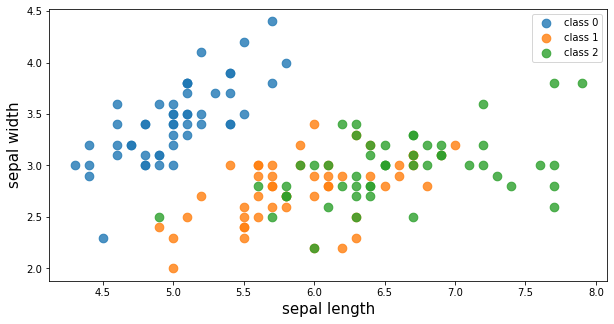

In [10]:
'plot the dataset'
plt.figure(figsize=(10,5))
for i in range(3):
    plt.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)
    
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.legend()

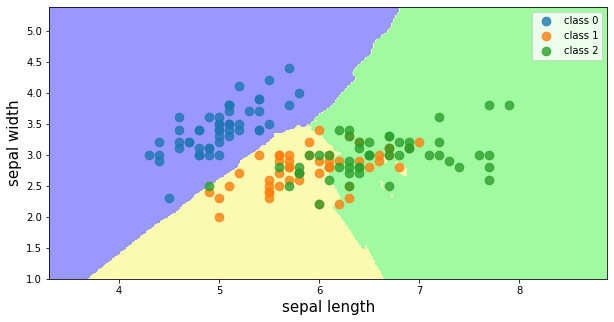

In [14]:
# knn hyperparameters
n_neighbors = 15
weights = 'uniform'

# fit a knn model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)
knn_clf.fit(X, y)

# mesh grid
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# evaluate classifier at all mesh grid points
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure(figsize=(10,5))
custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
plt.contourf(xx, yy, Z, cmap=custom_cmap)

# plot dataset
for i in range(3):
    plt.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)
    
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)

plt.legend()

### 2. Two-moons dataset

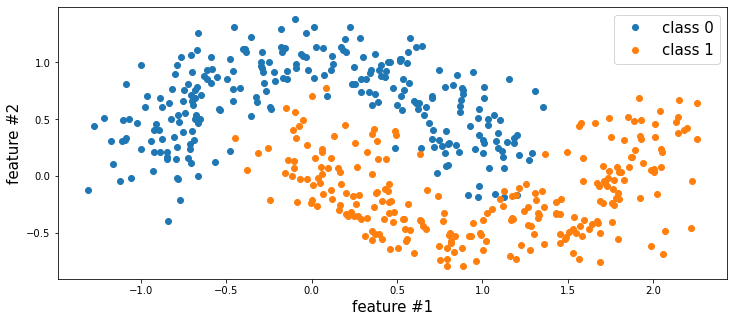

In [17]:
# run this cell to generate and plot the two-moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.2)

plt.figure(figsize=(12,5))
plt.plot(X[y==0,0],X[y==0,1],'o',label = 'class '+str(0))
plt.plot(X[y==1,0],X[y==1,1],'o',label = 'class '+str(1))

plt.xlabel('feature #1', fontsize=15)
plt.ylabel('feature #2', fontsize=15)

plt.legend(fontsize=15)

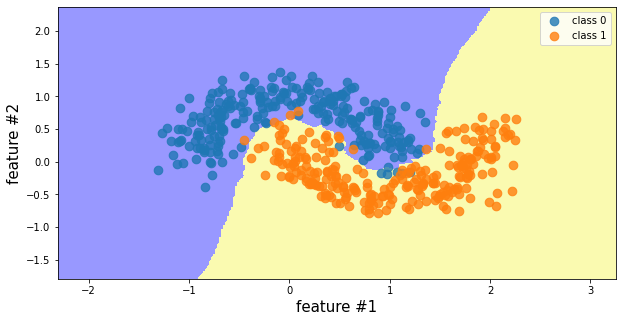

In [19]:
# knn hyperparameters
n_neighbors = 15
weights = 'uniform'

# fit a knn model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)
knn_clf.fit(X, y)

# mesh grid
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# evaluate classifier at all mesh grid points
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure(figsize=(10,5))
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
plt.contourf(xx, yy, Z, cmap=custom_cmap)

# plot dataset
for i in range(2):
    plt.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)
    
plt.xlabel('feature #1', fontsize=15)
plt.ylabel('feature #2', fontsize=15)

plt.legend()

### 3. Two-circles dataset

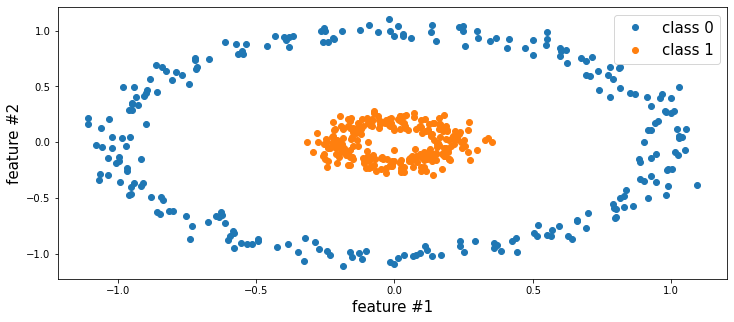

In [21]:
# run this cell to generate and plot the second toy dataset
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500,noise=0.05, factor=0.2)

plt.figure(figsize=(12,5))
plt.plot(X[y==0,0],X[y==0,1],'o',label = 'class '+str(0))
plt.plot(X[y==1,0],X[y==1,1],'o',label = 'class '+str(1))

plt.xlabel('feature #1', fontsize=15)
plt.ylabel('feature #2', fontsize=15)

plt.legend(fontsize=15)

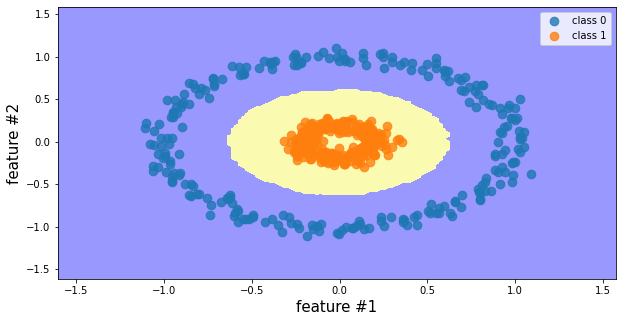

In [23]:
# knn hyperparameters
n_neighbors = 15
weights = 'uniform'

# fit a knn model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)
knn_clf.fit(X, y)

# mesh grid
h = .02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# evaluate classifier at all mesh grid points
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure(figsize=(10,5))
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
plt.contourf(xx, yy, Z, cmap=custom_cmap)

# plot dataset
for i in range(2):
    plt.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)
    
plt.xlabel('feature #1', fontsize=15)
plt.ylabel('feature #2', fontsize=15)

plt.legend()

### 4. Three-blobls dataset I

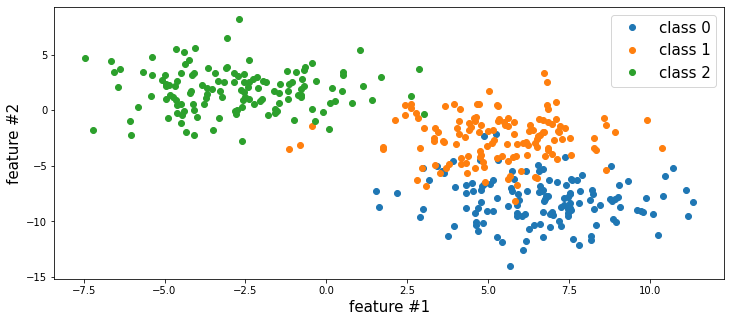

In [44]:
# generate a toy dataset
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples =400,
                 centers = 3,
                 cluster_std = 2.,
                 random_state=44) # 43


plt.figure(figsize=(12,5))
plt.plot(X[y==0,0],X[y==0,1],'o',label = 'class '+str(0))
plt.plot(X[y==1,0],X[y==1,1],'o',label = 'class '+str(1))
plt.plot(X[y==2,0],X[y==2,1],'o',label = 'class '+str(2))

plt.xlabel('feature #1', fontsize=15)
plt.ylabel('feature #2', fontsize=15)

plt.legend(fontsize=15)

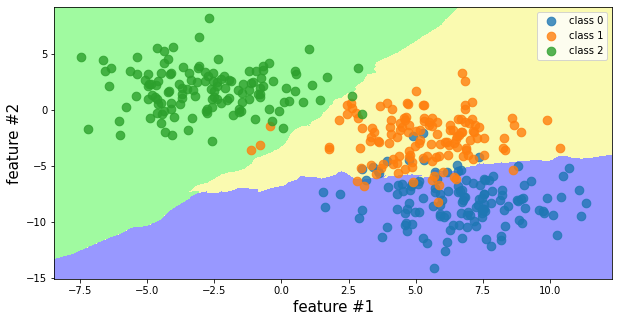

In [42]:
# knn hyperparameters
n_neighbors = 15
weights = 'uniform'

# fit a knn model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)
knn_clf.fit(X, y)

# mesh grid
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# evaluate classifier at all mesh grid points
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure(figsize=(10,5))
custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
plt.contourf(xx, yy, Z, cmap=custom_cmap)

# plot dataset
for i in range(3):
    plt.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)
    
plt.xlabel('feature #1', fontsize=15)
plt.ylabel('feature #2', fontsize=15)

plt.legend()

### 5. Three-blobs dataset II

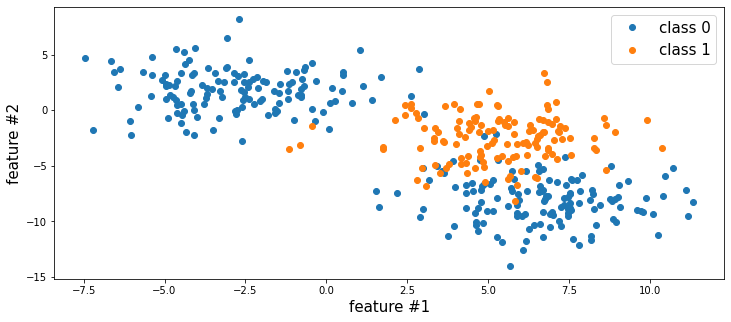

In [45]:
y[y==2]=0

plt.figure(figsize=(12,5))
plt.plot(X[y==0,0],X[y==0,1],'o',label = 'class '+str(0))
plt.plot(X[y==1,0],X[y==1,1],'o',label = 'class '+str(1))

plt.xlabel('feature #1', fontsize=15)
plt.ylabel('feature #2', fontsize=15)

plt.legend(fontsize=15)

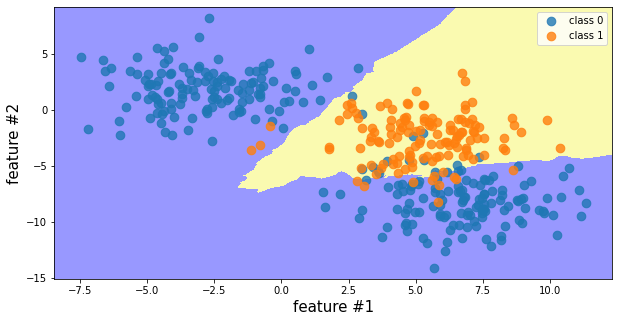

In [48]:
# knn hyperparameters
n_neighbors = 15
weights = 'uniform'

# fit a knn model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)
knn_clf.fit(X, y)

# mesh grid
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# evaluate classifier at all mesh grid points
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure(figsize=(10,5))
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
plt.contourf(xx, yy, Z, cmap=custom_cmap)

# plot dataset
for i in range(2):
    plt.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)
    
plt.xlabel('feature #1', fontsize=15)
plt.ylabel('feature #2', fontsize=15)

plt.legend()

## Appendix

Code to generate the .gif figure

In [5]:
# parameters
n_neighbors = 10
n_new_points = 10
colors = ['C0','C1','C2']

In [6]:
# generate a toy dataset
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples =200,
                 centers = 3,
                 cluster_std = 2.,
                 random_state=6)

In [7]:
theta = np.linspace(0,2*np.pi,100)
for j in range(n_new_points):
    'new point'
    new_point = [-5,-15]+[15,20]*np.random.rand(2)
    
    'img+0'
    plt.figure(figsize=(10,5))
    for i in range(3):
        plt.scatter(X[y==i,0], X[y==i,1],  label='class '+str(i), s=75, alpha=0.8)
    plt.legend()
    plt.xlim([-15,15])
    plt.ylim([-15,15])
    plt.savefig('ximg'+str(6*j+0))
    plt.clf()
    plt.close()
    
    'img+1'
    plt.figure(figsize=(10,5))
    for i in range(3):
        plt.scatter(X[y==i,0], X[y==i,1],  label='class '+str(i), s=75, alpha=0.8)
    plt.legend()
    plt.xlim([-15,15])
    plt.ylim([-15,15])
    
    
    plt.scatter(new_point[0],new_point[1],c='k', s=75)
    plt.annotate('new point', 
                 xy = new_point,
                 xytext = new_point+[1,1],
                 fontsize=15,
                 arrowprops = dict(arrowstyle="->"))
    plt.savefig('ximg'+str(6*j+1))
    plt.clf()
    plt.close()
    
    'img+2'
    plt.figure(figsize=(10,5))
    for i in range(3):
        plt.scatter(X[y==i,0], X[y==i,1],  label='class '+str(i), s=75, alpha=0.8)
    plt.legend()
    plt.xlim([-15,15])
    plt.ylim([-15,15])

    plt.scatter(new_point[0],new_point[1],c='k', s=75)
    plt.savefig('ximg'+str(6*j+2))
    plt.clf()
    plt.close()
    
    'img+3'
    plt.figure(figsize=(10,5))
    for i in range(3):
        plt.scatter(X[y==i,0], X[y==i,1],  label='class '+str(i), s=75, alpha=0.8)
    plt.legend()
    plt.xlim([-15,15])
    plt.ylim([-15,15])

    plt.scatter(new_point[0],new_point[1],c='k', s=75)
    
    r = np.sort(np.linalg.norm(X-new_point,axis=1))[n_neighbors]
    x1 = new_point[0] + r*np.cos(theta)
    x2 = new_point[1] + r*np.sin(theta)
    plt.plot(x1,x2,'--k')

    plt.annotate(str(n_neighbors)+' nearest neighbors',
                 xy = new_point,
                 xytext = new_point+[r,r],
                 fontsize=15,
                 annotation_clip=False)
    
    idx = np.argsort(np.linalg.norm(X-new_point,axis=1))[:n_neighbors]
    plt.scatter(X[idx,0],X[idx,1],facecolors='none', edgecolors='k', s=75, )
    
    plt.savefig('ximg'+str(6*j+3))
    plt.clf()
    plt.close()
    
    'img+4'
    plt.figure(figsize=(10,5))
    for i in range(3):
        plt.scatter(X[y==i,0], X[y==i,1],  label='class '+str(i), s=75, alpha=0.8)
    plt.legend()
    plt.xlim([-15,15])
    plt.ylim([-15,15])

    plt.scatter(new_point[0],new_point[1],c='k', s=75)
    
    idx = np.argsort(np.linalg.norm(X-new_point,axis=1))[:n_neighbors]
    plt.scatter(X[idx,0],X[idx,1],facecolors='none', edgecolors='k', s=75, )
    nearest_labels = y[idx]
                       
    pred_class= np.argmax(np.bincount(nearest_labels, minlength=3))
    
    plt.plot(x1,x2,'--k')

    plt.annotate('assigned to class '+str(pred_class),
                 xy = new_point,
                 xytext = new_point+[r,r],
                 fontsize=15)
    
    
    
    plt.savefig('ximg'+str(6*j+4))
    plt.clf()
    plt.close()
    
    'img+5'
    plt.figure(figsize=(10,5))
    for i in range(3):
        plt.scatter(X[y==i,0], X[y==i,1],  label='class '+str(i), s=75, alpha=0.8)
    plt.legend()
    plt.xlim([-15,15])
    plt.ylim([-15,15])

    plt.scatter(new_point[0],new_point[1],c=colors[pred_class], s=75)
    
    plt.scatter(X[idx,0],X[idx,1],facecolors='none', edgecolors='k', s=75, )

    
    plt.plot(x1,x2,'--k')

    plt.annotate('assigned to class '+str(pred_class),
                 xy = new_point,
                 xytext = new_point+[r,r],
                 fontsize=15)
    
    
    
    plt.savefig('ximg'+str(6*j+5))
    plt.clf()
    plt.close()
    
    X = np.r_[X,new_point[None,:]]
    y = np.append(y,pred_class)

In [8]:
# put images into a .gif
from PIL import Image
import glob

frames = []
imgs = ['ximg'+str(i)+'.png' for i in range(30)]
for i in imgs:
    frames.append(Image.open(i))

frames[0].save('knn.gif',
               format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1300,
               loop=0)
